In [41]:
# Training Data
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

# Linear Regression Example

A linear regression learning algorithm example using TensorFlow library.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [42]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

In [43]:
# Parameters
learning_rate = 0.01
training_epochs = 1000
display_step = 50

In [44]:
# tf Graph Input
X = tf.placeholder("float")
Y = tf.placeholder("float")

# Set model weights
W = tf.Variable(rng.randn(), name="weight")
B = tf.Variable(rng.randn(), name="bias")

In [45]:
# Construct a linear model
pred = tf.add(tf.multiply(X, W), B)

In [46]:
# Mean squared error
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
# Gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [47]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Epoch: 0050 cost= 0.129350364 W= 0.377614 B= -0.119503
Epoch: 0100 cost= 0.123296723 W= 0.37 B= -0.0647283
Epoch: 0150 cost= 0.117942415 W= 0.362839 B= -0.0132115
Epoch: 0200 cost= 0.113206655 W= 0.356104 B= 0.0352412
Epoch: 0250 cost= 0.109017991 W= 0.349769 B= 0.0808123
Epoch: 0300 cost= 0.105313279 W= 0.343811 B= 0.123673
Epoch: 0350 cost= 0.102036677 W= 0.338207 B= 0.163985
Epoch: 0400 cost= 0.099138670 W= 0.332937 B= 0.201899
Epoch: 0450 cost= 0.096575536 W= 0.32798 B= 0.237558
Epoch: 0500 cost= 0.094308674 W= 0.323318 B= 0.271097
Epoch: 0550 cost= 0.092303775 W= 0.318934 B= 0.302641
Epoch: 0600 cost= 0.090530694 W= 0.314809 B= 0.332308
Epoch: 0650 cost= 0.088962600 W= 0.310931 B= 0.360211
Epoch: 0700 cost= 0.087575749 W= 0.307283 B= 0.386455
Epoch: 0750 cost= 0.086349308 W= 0.303852 B= 0.411137
Epoch: 0800 cost= 0.085264705 W= 0.300625 B= 0.434352
Epoch: 0850 cost= 0.084305495 W= 0.29759 B= 0.456186
Epoch: 0900 cost= 0.083457313 W= 0.294735 B= 0.476722
Epoch: 0950 cost= 0.0827072

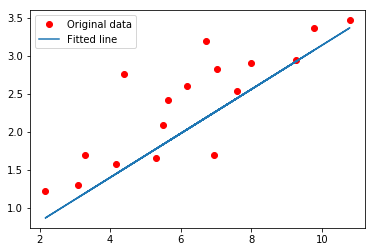

In [52]:
# Start training
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print ("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "B=", sess.run(B))

    print ("Optimization Finished!")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print ("Training cost=", training_cost, "W=", sess.run(W), "B=", sess.run(B), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

In [53]:
# Regression result